In [478]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
import joblib

# **Assignment 1 – Simple Linear Regression**
**Goal:** Understand the basics of regression by creating your own dataset.

### Steps:
1. Formulate your own equation in the form:  
   $
   y = m x + c
   $
   
   Example: $y = 2x + 3$
2. Generate X values (at least 100 numbers between your chosen range).
3. Generate Y values using your equation.
4. Add small random noise to Y to make it realistic.
5. Split data into train and test splits
6. Fit a Simple Linear Regression model.
7. Print learned coefficient and intercept.
8. Split the data into train and test sets (80%-20%).
9. Evaluate both train and test using MAE, MSE, R² score.
> Write your notes about model performance and whether the model suffers from overfitting or underfitting.
10. Visualize the points and the fitted line.


In [479]:
m = 2
c = 3

In [480]:
np.random.seed(42)
x = np.random.randint(0,100 ,200)
y = m*x + c

In [481]:
noise = np.random.normal(0, 5, 200)
y = y + noise

In [482]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)

In [483]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [484]:
print(f"coffecient: {model.coef_}")
print(f"intersection: {model.intercept_}")

coffecient: [2.01051756]
intersection: 3.0273248363422027


In [485]:
y_train_prediction = model.predict(x_train)
y_test_prediction = model.predict(x_test)

In [486]:
# Train data
print(f"MAE: {mean_absolute_error(y_train, y_train_prediction)}")
print(f"MSE: {mean_squared_error(y_train, y_train_prediction)}")
print(f"R2 score: {r2_score(y_train, y_train_prediction)}")

MAE: 4.0296596843181245
MSE: 26.32350467839318
R2 score: 0.9926683751640674


In [487]:
# Test data
print(f"MAE: {mean_absolute_error(y_test, y_test_prediction)}")
print(f"MSE: {mean_squared_error(y_test, y_test_prediction)}")
print(f"R2 score: {r2_score(y_test, y_test_prediction)}")

MAE: 3.854102083094248
MSE: 23.193394196871207
R2 score: 0.993235708962419


> **insight**
- by comparing the **R2 score** for both train and test we can see that both have high values nearing 1 while also having minute diffrence between each other
- by also comparing the diffrence between **MAE** and **MSE** for both train and test we can confirem that the first insight is `True`

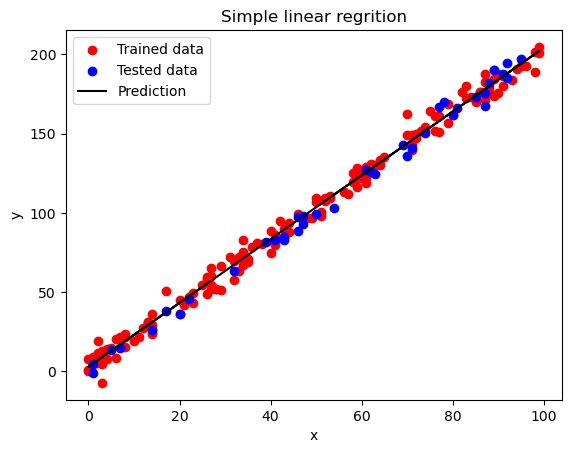

In [488]:
plt.scatter(x_train, y_train, c = "red", label = "Trained data")
plt.scatter(x_test, y_test, c = "blue", label = "Tested data")
plt.plot(x, model.predict(x.reshape(-1,1)), c="black", label = "Prediction")
plt.title("Simple linear regrition")
plt.xlabel("x")
plt.ylabel("y")
plt.legend();

# **Assignment 2 – Multiple Linear Regression**
**Goal:** See how multiple features affect predictions.

### Steps:
1. Formulate your own equation:
   $
   y = a_1 x_1 + a_2 x_2 + c
   $
2. Generate `x1` and `x2` values (at least 100 numbers each).
3. Generate Y values with noise.
4. Split data into train and test splits
5. Fit a Multiple Linear Regression model.
6. Compare coefficients and intercept to your original equation.
7. Evaluate both train and test using MAE, MSE, R² score.
> Write your notes about model performance and whether the model suffers from overfitting or underfitting.



In [489]:
a1 = 3
a2 = 4
c = 5

In [490]:
np.random.seed(42)
x1 = np.random.randint(0,100,200)
x2 = np.random.randint(0,50,200)
y = a1*x1 + a2*x2 + c

In [491]:
noise = np.random.normal(0,5,200)
y = y + noise

In [492]:
x = pd.DataFrame({"x1":x1})
x["x2"] = x2

In [493]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [494]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [495]:
print(f"a1: {model.coef_[0]}")
print(f"a2: {model.coef_[1]}")
print(f"c: {model.intercept_}")

a1: 2.993729293074346
a2: 3.9667281905191536
c: 5.736834603094394


In [496]:
y_train_prediction = model.predict(x_train)
y_test_prediction = model.predict(x_test)

In [497]:
# Train data
print(f"MAE: {mean_absolute_error(y_train, y_train_prediction)}")
print(f"MSE: {mean_squared_error(y_train, y_train_prediction)}")
print(f"R2 score: {r2_score(y_train, y_train_prediction)}")

MAE: 4.195780481495719
MSE: 26.85701124278154
R2 score: 0.9979278476700199


In [498]:
# Test data
print(f"MAE: {mean_absolute_error(y_test, y_test_prediction)}")
print(f"MSE: {mean_squared_error(y_test, y_test_prediction)}")
print(f"R2 score: {r2_score(y_test, y_test_prediction)}")

MAE: 4.9652460082293235
MSE: 35.679176495332015
R2 score: 0.9968723044001795


> **insight**
- by comparing the **R2 score** for both train and test we can see that both have high values nearing 1 while also having minute diffrence between each other
- by also comparing the diffrence between **MAE** and **MSE** for both train and test we can confirem that the first insight is `True`

# **Assignment 3 – Polynomial Regression**
**Goal:** Model non-linear relationships.

### Steps:
1. Formulate your own equation:
   $
   y = ax^2 + bx + c
   $
2. Generate X values and Y values with noise.
3. Use `PolynomialFeatures` to transform X.
4. Split the data into train and test sets (80%-20%).
5. Fit a Linear Regression model on transformed features.
6. Evaluate both train and test using MAE, MSE, R² score.
> Write your notes about model performance and whether the model suffers from overfitting or underfitting.



In [499]:
a = 2
b = 3
c = 4

In [500]:
np.random.seed(42)
x = np.random.randint(0,100,200)
y = a*x**2 + b*x + c

In [501]:
noise = np.random.normal(0,5,200)
y = y + noise

In [502]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [503]:
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train.reshape(-1, 1))
x_test_poly = poly.transform(x_test.reshape(-1,1))

In [504]:
model = LinearRegression()
model.fit(x_train_poly,y_train)

LinearRegression()

In [505]:
y_train_prediction = model.predict(x_train_poly)
y_test_prediction = model.predict(x_test_poly)

In [506]:
# Train data
print(f"MAE: {mean_absolute_error(y_train, y_train_prediction)}")
print(f"MSE: {mean_squared_error(y_train, y_train_prediction)}")
print(f"R2 score: {r2_score(y_train, y_train_prediction)}")

MAE: 4.026903699953182
MSE: 26.301523678053787
R2 score: 0.9999992535215612


In [507]:
# Test data
print(f"MAE: {mean_absolute_error(y_test, y_test_prediction)}")
print(f"MSE: {mean_squared_error(y_test, y_test_prediction)}")
print(f"R2 score: {r2_score(y_test, y_test_prediction)}")

MAE: 3.88067516597294
MSE: 23.633828325470986
R2 score: 0.9999993268041553


> **insight**
- by comparing the **R2 score** for both train and test we can see that both have high values nearing 1 while also having minute diffrence between each other
- by also comparing the diffrence between **MAE** and **MSE** for both train and test we can confirem that the first insight is `True`

## Machine Learning Project Pipeline

### 1. **Exploratory Data Analysis (EDA)**
- Inspect dataset structure (`.info()`, `.describe()`)
- Check for missing values and duplicates
- Understand feature types (numeric, categorical, datetime, etc.)
- Visualize data distributions (histograms, boxplots, bar charts)
- Identify correlations between features and target
- Detect outliers and anomalies

---

### 2. **Data Cleaning**
- Handle missing values (drop, fill with mean/median/mode, or use predictive imputation)
- Remove duplicates
- Fix inconsistent data formats (e.g., date parsing, string trimming)
- Correct data entry errors or outliers (if verified)

---

### 3. **Data Pre-processing**
- Convert data types if necessary (e.g., `object` to `datetime` or numeric)
- Handle categorical variables:
  - **Encoding**:
    - One-Hot Encoding (for nominal categories)
    - Ordinal Encoding (for ordered categories)
- Verify numeric features:
  - Check for incorrect values (e.g., negative ages)
  - Apply transformations if needed (e.g., log transform for skewed data)

---

### 4. **Scaling Numeric Features**
- Standardization (`StandardScaler`) — mean = 0, std = 1
- Normalization (`MinMaxScaler`) — values between 0 and 1
- Robust Scaling (less sensitive to outliers)

---

### 5. **Splitting Data**
- **Train-Test Split**
  - Typically 70–80% for training, 20–30% for testing
  - Use `train_test_split` from `sklearn`
  - Set `random_state` for reproducibility
- Optional: create a **validation set** for model tuning

---

### 6. **Modeling**
- Choose model type based on task:
  - **Regression:** Linear Regression
- Train the model on training data (Your target is `price`)

---

### 7. **Evaluating the Model**
- **On Training Data**:
  - Evaluate for underfitting (low train performance)
- **On Testing Data**:
  - Evaluate for overfitting (high train, low test performance)
- Metrics:
  - **Regression:** MAE, MSE, RMSE, R²

---

### 8. **Final Steps**
- Save the model (`joblib` or `pickle`)



## OPTIONAL SUGGESTIONS for Visualizations for Flight Price Dataset
> **YOU MUST MAKE VISUALIZATIONS. THESE ARE ONLY SUGGESTIONS**
### 1. **Numeric Data Visualizations**
(Columns: `duration`, `days_left`, `price`)

**a. Distribution of Numeric Features**
- **Histograms / KDE plots**  
  - Price distribution — check for skewness.  
  - Duration distribution — detect common flight lengths.  
  - Days left — reveal booking patterns.

**b. Boxplots for Outlier Detection**
- Boxplot of `price` — spot extreme values.
- Boxplot of `duration` grouped by `class` or `airline`.

**c. Price vs Numeric Feature Relationships**
- Scatter plot: `price` vs `duration` (color by `class` or `airline`).
- Scatter plot: `price` vs `days_left` (color by `class` or `stops`).

---

### 2. **Categorical Data Visualizations**
(Columns: `airline`, `flight`, `source_city`, `departure_time`, `stops`, `arrival_time`, `destination_city`, `class`)

**a. Price Trends by Category**
- **Boxplots**
  - `price` by `airline` — compare average fares.
  - `price` by `source_city` or `destination_city`.
  - `price` by `stops` — direct vs connecting flights.

**b. Frequency Counts**
- Bar plots of `airline` frequency — market share.
- Bar plots of `source_city` and `destination_city` — most common routes.
- Bar plots of `departure_time` (morning, afternoon, evening, night) — popular times.

**c. Grouped Statistics**
- Mean `price` by `airline` and `class` — grouped bar plots.
- Mean `price` by `(source_city, destination_city)` pairs.

---

### 3. **Mixed Insights**

**a. Heatmaps / Pivot Tables**
- Pivot table: average `price` for each `(source_city, destination_city)` pair — show as heatmap.
- Pivot table: average `price` for each `(airline, class)` — reveal premium vs economy gap.

**b. Correlation Heatmap (Numeric Only)**
- Show correlation between `duration`, `days_left`, and `price`.

---
*These visualizations can reveal pricing patterns, airline competitiveness, route popularity, and booking behavior trends.*


## solution

In [508]:
import kagglehub
import os
# Download latest version
path = kagglehub.dataset_download("rohitgrewal/airlines-flights-data")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\User\.cache\kagglehub\datasets\rohitgrewal\airlines-flights-data\versions\1


In [509]:
os.listdir(path)

['airlines_flights_data.csv']

In [510]:
full_path = os.path.join(path,os.listdir(path)[0])

In [511]:
import pandas as pd
original_df = pd.read_csv(full_path)

In [512]:
original_df. head()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [513]:
original_df.describe(include="all")

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
count,300153.000000,300153,300153,300153,300153,300153,300153,300153,300153,300153.000000,300153.000000,300153.000000
unique,NaN,6,1561,6,6,3,6,6,2,NaN,NaN,NaN
top,NaN,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy,NaN,NaN,NaN
freq,NaN,127859,3235,61343,71146,250863,91538,59097,206666,NaN,NaN,NaN
mean,150076.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.221021,26.004751,20889.660523
std,86646.852011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.191997,13.561004,22697.767366
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.830000,1.000000,1105.000000
25%,75038.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.830000,15.000000,4783.000000
50%,150076.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.250000,26.000000,7425.000000
75%,225114.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.170000,38.000000,42521.000000


In [514]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [515]:
df = original_df.drop("index",axis=1)
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [516]:
print(f"dupes sum is {df.duplicated().sum()} \n ")
print(f"null list \n\n{df.isnull().sum()}")

dupes sum is 0 
 
null list 

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64


the data doesn't contain any dupes or null value -> `clean data`

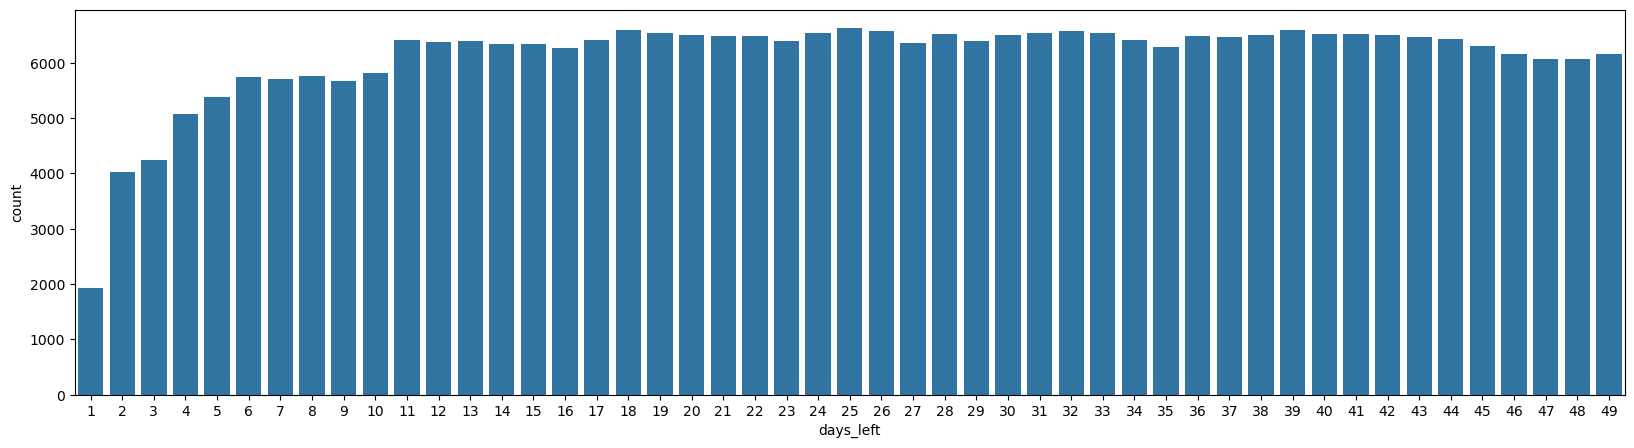

In [517]:
plt.figure(figsize=(20,5))
sns.countplot(data = df, x= "days_left");

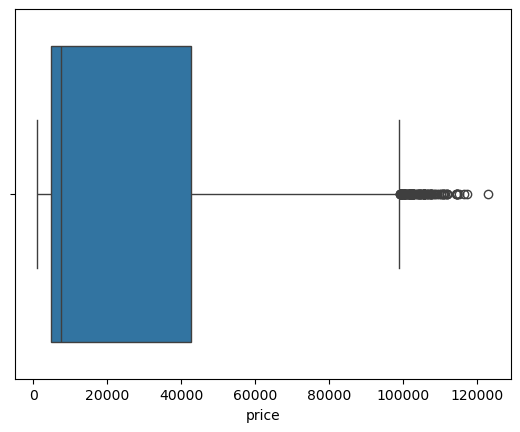

In [518]:
sns.boxplot(data=df, x="price");

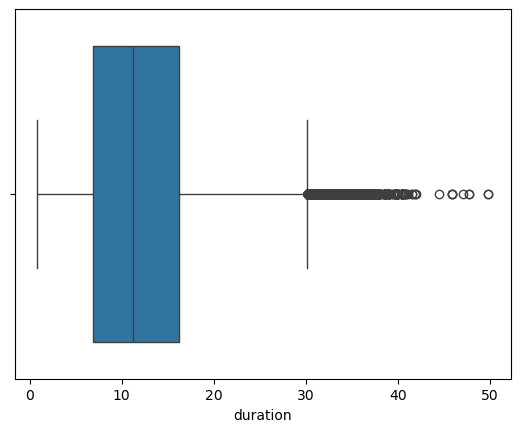

In [519]:
sns.boxplot(data=df, x="duration");

In [520]:
df["class_encoded"] = pd.Categorical(df["class"], ["Economy", "Business"], ordered=True).codes

In [521]:
list = ["Early_Morning","Morning","Afternoon","Evening","Night","Late_Night"]

In [522]:
df["departure_time_encoded"] = pd.Categorical(df["departure_time"], categories=list, ordered=True).codes
df["arrival_time_encoded"] = pd.Categorical(df["arrival_time"], categories=list, ordered=True).codes

In [523]:
df["stops_encoded"] = np.select([df["stops"] == "zero", df["stops"] == "one"], [0,1], default=2)
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,class_encoded,departure_time_encoded,arrival_time_encoded,stops_encoded
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,0,3,4,0
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,0,0,1,0
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,0,0,0,0
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,0,1,2,0
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,0,1,1,0


In [524]:
hot_encoder = OneHotEncoder(sparse_output=False)

encoded = hot_encoder.fit_transform(df[["airline"]])
encoded = pd.DataFrame(encoded, columns=hot_encoder.get_feature_names_out(['airline']))
df = pd.concat([df, encoded], axis = 1)

In [525]:
hot_encoder = OneHotEncoder(sparse_output=False)
encoded = hot_encoder.fit_transform(df[["source_city"]])
encoded = pd.DataFrame(encoded, columns=hot_encoder.get_feature_names_out(['source_city']))
df = pd.concat([df, encoded], axis = 1)

In [526]:
hot_encoder = OneHotEncoder(sparse_output=False)
encoded = hot_encoder.fit_transform(df[["destination_city"]])
encoded = pd.DataFrame(encoded, columns=hot_encoder.get_feature_names_out(['destination_city']))
df = pd.concat([df, encoded], axis = 1)

**note**
- the only that wasnt encoded is the flight columns because it contain more than **1500** unique values

In [527]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [528]:
min_max_scaller = MinMaxScaler()
df_train["day_left_min_maxed"] = min_max_scaller.fit_transform(df_train[["days_left"]])
df_test["day_left_min_maxed"] = min_max_scaller.transform(df_test[["days_left"]])

In [529]:
robust_scaller = RobustScaler()
df_train["price_robust_scaled"] = robust_scaller.fit_transform(df_train[["price"]])
df_test["price_robust_scaled"] = robust_scaller.transform(df_test[["price"]])
df_train["duration_robust_scaled"] = robust_scaller.fit_transform(df_train[["duration"]])
df_test["duration_robust_scaled"] = robust_scaller.transform(df_test[["duration"]])

In [530]:
columns_df = pd.DataFrame({"train":df_train.columns, "test":df_test.columns})
columns_df

,train,test
0,airline,airline
1,flight,flight
2,source_city,source_city
3,departure_time,departure_time
4,stops,stops
5,arrival_time,arrival_time
6,destination_city,destination_city
7,class,class
8,duration,duration
9,days_left,days_left


In [531]:
model = LinearRegression()
model.fit(df_train[["day_left_min_maxed", "duration_robust_scaled", "class_encoded","stops_encoded"]], df_train["price_robust_scaled"])

LinearRegression()

In [532]:
print(f"a1: {model.coef_[0]}")
print(f"a2: {model.coef_[1]}")
print(f"a3: {model.coef_[2]}")
print(f"a4: {model.coef_[3]}")
print(f"c: {model.intercept_}")

a1: -0.16544300032062287
a2: 0.01664011426272706
a3: 1.2128587799549018
a4: 0.16387985668965424
c: -0.08787327928439276


In [533]:
y_train_prediction = model.predict(df_train[["day_left_min_maxed", "duration_robust_scaled", "class_encoded","stops_encoded"]])
y_test_prediction = model.predict(df_test[["day_left_min_maxed", "duration_robust_scaled", "class_encoded", "stops_encoded"]])

In [534]:
# Train data
print(f"MAE: {mean_absolute_error(df_train["price_robust_scaled"], y_train_prediction)}")
print(f"MSE: {mean_squared_error(df_train["price_robust_scaled"], y_train_prediction)}")
print(f"R2 score: {r2_score(df_train["price_robust_scaled"], y_train_prediction)}")

MAE: 0.12261069266301237
MSE: 0.03609288351624643
R2 score: 0.9002123582626732


In [535]:
# Test data
print(f"MAE: {mean_absolute_error(df_test["price_robust_scaled"], y_test_prediction)}")
print(f"MSE: {mean_squared_error(df_test["price_robust_scaled"], y_test_prediction)}")
print(f"R2 score: {r2_score(df_test["price_robust_scaled"], y_test_prediction)}")

MAE: 0.12177842890139383
MSE: 0.03614176449748421
R2 score: 0.9001487797463545


> **insight**
- by comparing the **R2 score** for both train and test we can see that both have high values nearing 1 while also having minute diffrence between each other
- by also comparing the diffrence between **MAE** and **MSE** for both train and test we can confirem that the first insight is `True`

In [536]:
joblib.dump(model, "model.joblib")

['model.joblib']

## Visualizations
> **Numeric Data Visualizations**

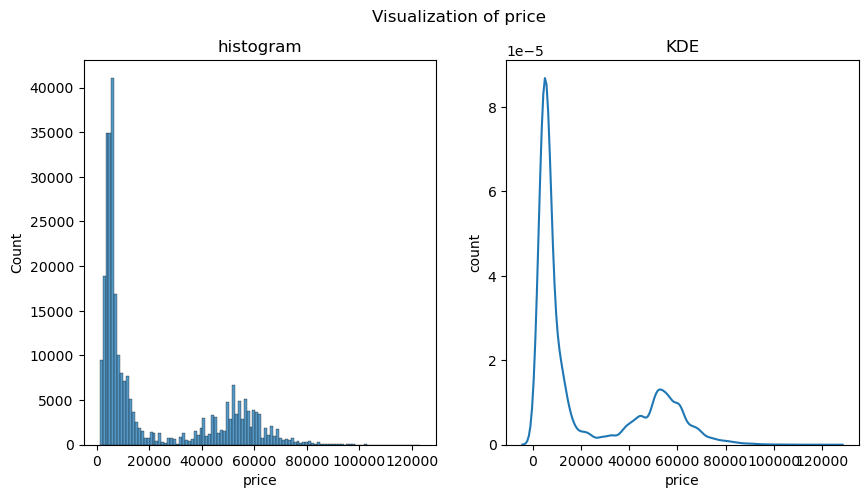

In [537]:
plt.figure(figsize=(10,5))
plt.suptitle("Visualization of price")
plt.subplot(1,2,1)
plt.title("histogram")
sns.histplot(data=df, x="price")
plt.subplot(1, 2, 2)
plt.title("KDE")
plt.ylabel("count")
sns.kdeplot(data=df, x="price");

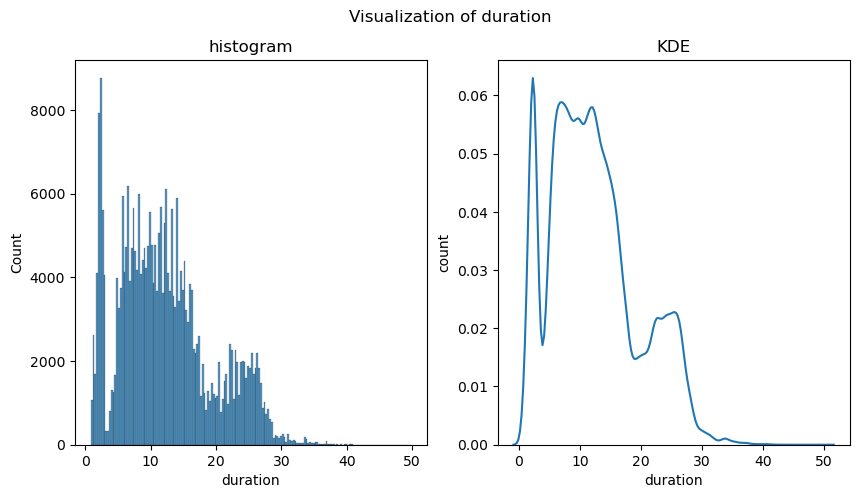

In [538]:
plt.figure(figsize=(10,5))
plt.suptitle("Visualization of duration")
plt.subplot(1,2,1)
plt.title("histogram")
sns.histplot(data=df, x="duration")
plt.subplot(1, 2, 2)
plt.title("KDE")
plt.ylabel("count")
sns.kdeplot(data=df, x="duration");

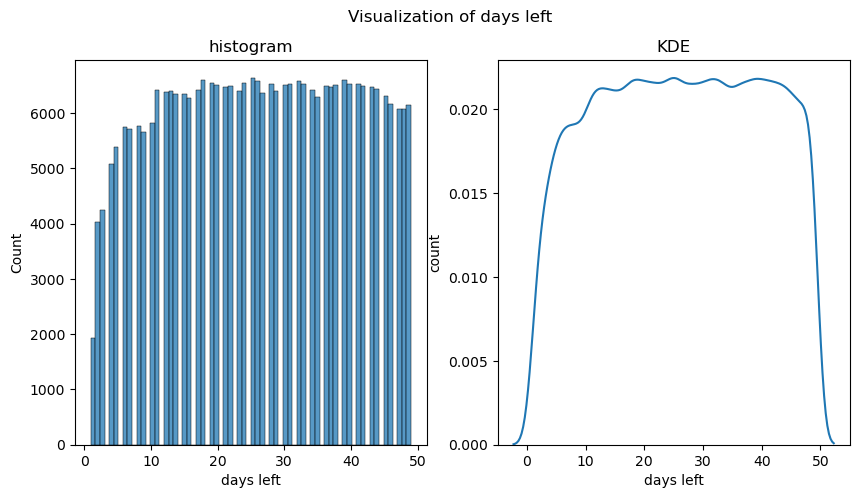

In [539]:
plt.figure(figsize=(10,5))
plt.suptitle("Visualization of days left")
plt.subplot(1,2,1)
plt.title("histogram")
plt.xlabel("days left")
sns.histplot(data=df, x="days_left")
plt.subplot(1, 2, 2)
plt.title("KDE")
plt.xlabel("days left")
plt.ylabel("count")
sns.kdeplot(data=df, x="days_left");

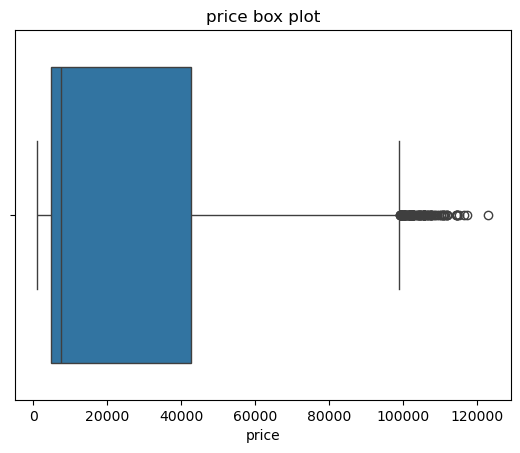

In [540]:
plt.title("price box plot")
sns.boxplot(data=df, x="price");

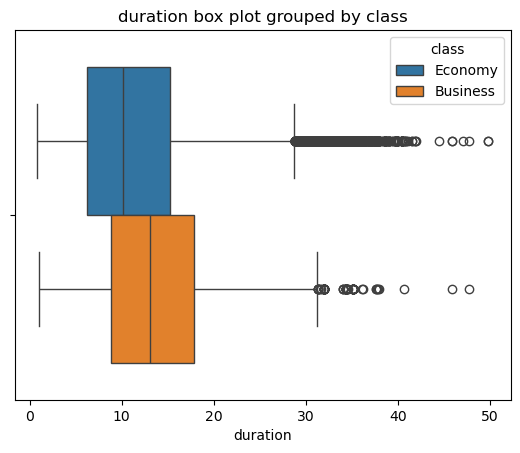

In [541]:
plt.title("duration box plot grouped by class")
sns.boxplot(data=df, x="duration", hue="class");

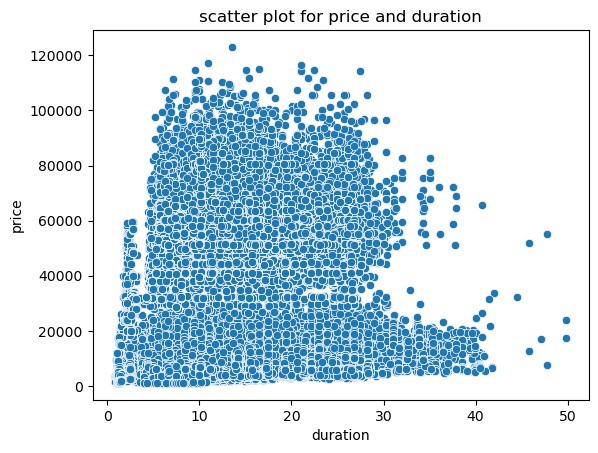

In [542]:
plt.title("scatter plot for price and duration")
sns.scatterplot(data=df, x="duration", y="price");

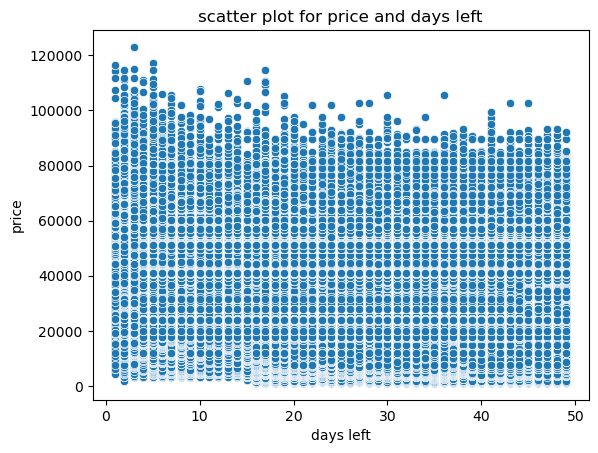

In [543]:
plt.title("scatter plot for price and days left")
plt.xlabel("days left")
sns.scatterplot(data=df, x="days_left", y="price");

> categorical data

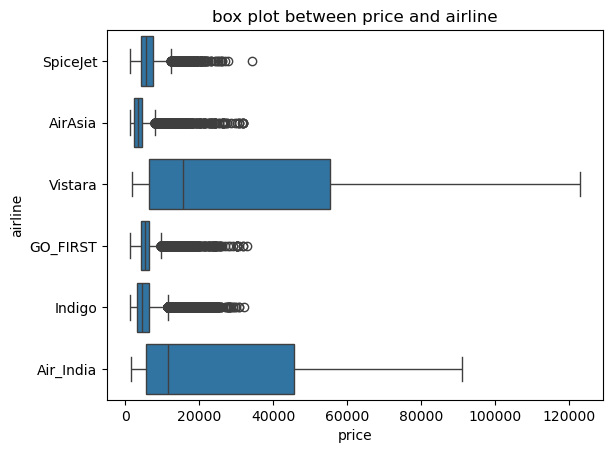

In [544]:
plt.title("box plot between price and airline")
sns.boxplot(data=df, x="price", y="airline");

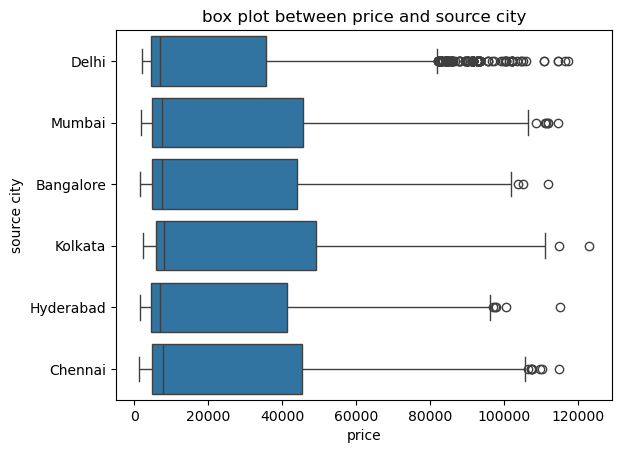

In [545]:
plt.title("box plot between price and source city")
plt.ylabel("source city")
sns.boxplot(data=df, x="price", y="source_city");

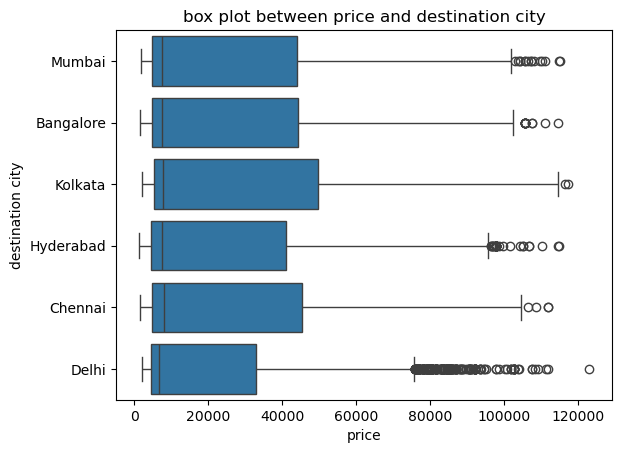

In [546]:
plt.title("box plot between price and destination city")
plt.ylabel("destination city")
sns.boxplot(data=df, x="price", y="destination_city");

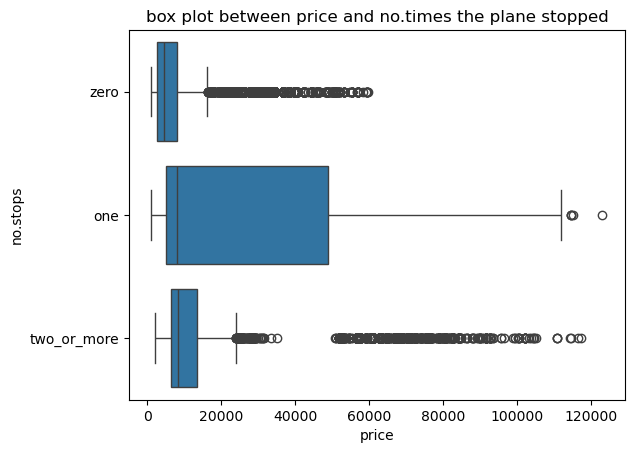

In [547]:
plt.title("box plot between price and no.times the plane stopped")
plt.ylabel("no.stops")
sns.boxplot(data=df, x="price", y="stops");

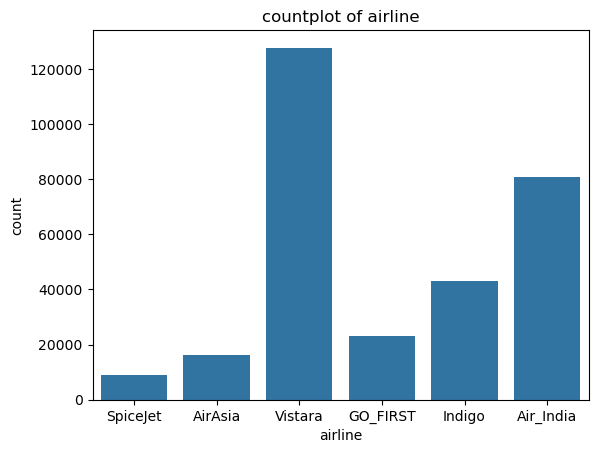

In [548]:
plt.title("countplot of airline")
sns.countplot(data=df, x="airline");

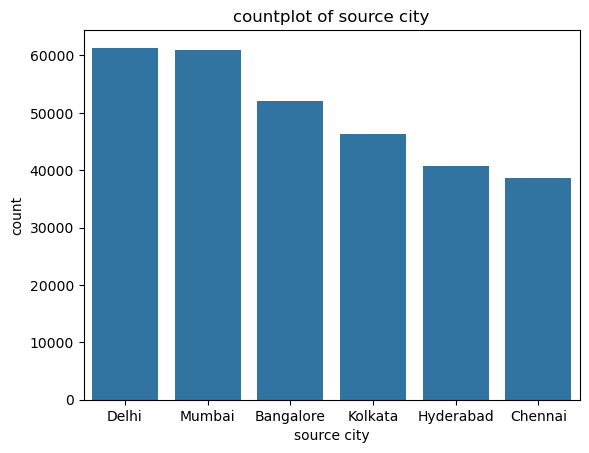

In [549]:
plt.title("countplot of source city")
plt.xlabel("source city")
sns.countplot(data=df, x="source_city");

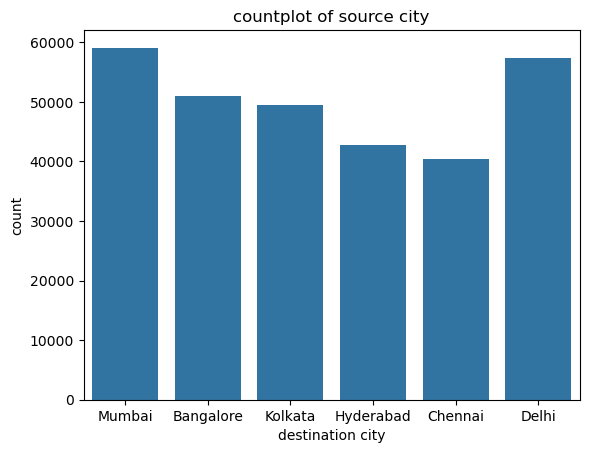

In [550]:
plt.title("countplot of source city")
plt.xlabel("destination city")
sns.countplot(data=df, x="destination_city");

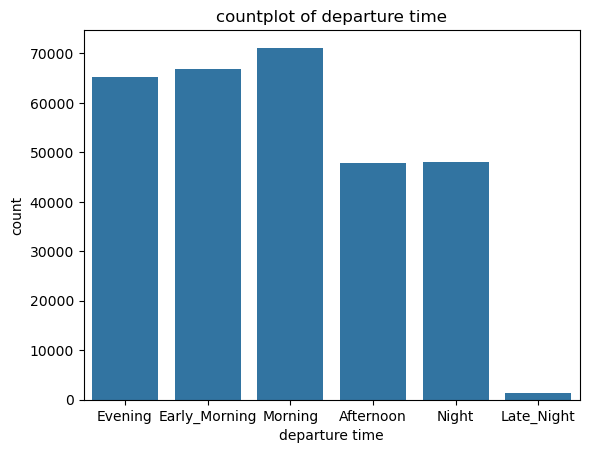

In [551]:
plt.title("countplot of departure time")
plt.xlabel("departure time")
sns.countplot(data=df, x="departure_time");

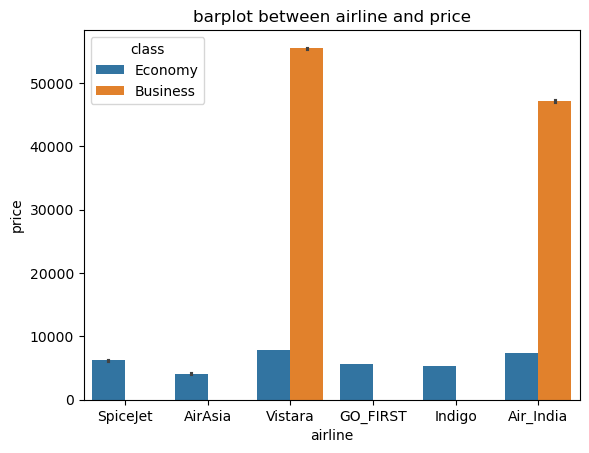

In [552]:
plt.title("barplot between airline and price")
sns.barplot(data=df, x="airline", y="price", hue="class");

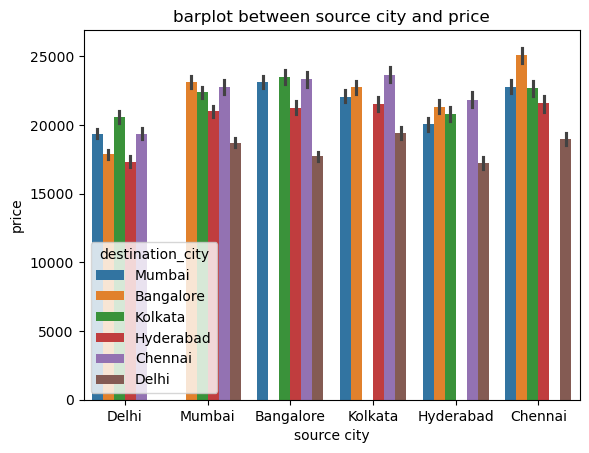

In [553]:
plt.title("barplot between source city and price")
plt.xlabel("source city")
sns.barplot(data=df, x="source_city", y="price", hue="destination_city");

> Mixed Insights

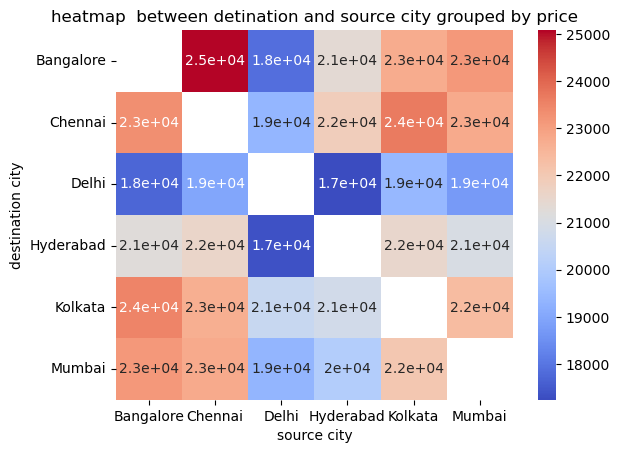

In [554]:
plt.title("heatmap  between detination and source city grouped by price")
pivot = pd.pivot_table(data=df, index="destination_city", columns="source_city", values="price", )
sns.heatmap(data=pivot, cmap="coolwarm", annot=True)
plt.xlabel("source city")
plt.ylabel("destination city");

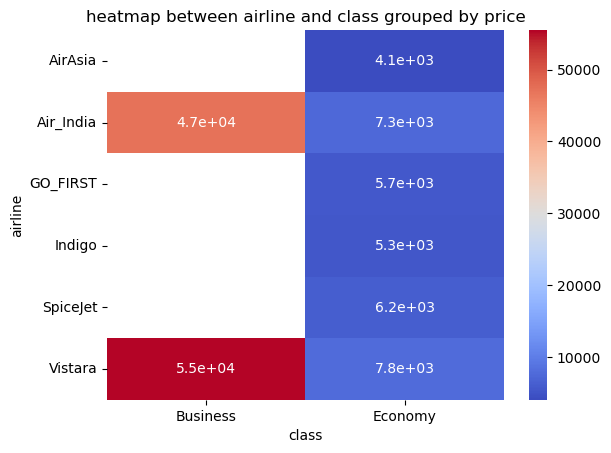

In [555]:
plt.title("heatmap between airline and class grouped by price")
pivot = pd.pivot_table(data=df, index="airline", columns="class", values="price")
sns.heatmap(data=pivot, cmap="coolwarm", annot=True);

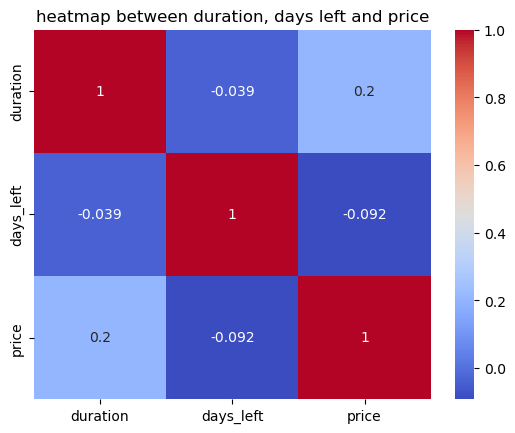

In [556]:
plt.title("heatmap between duration, days left and price")
corr = df[["duration", "days_left", "price"]].corr()
sns.heatmap(data=corr, cmap="coolwarm", annot=True);